In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# **Task 1**

In [35]:


image = cv2.imread('imgs/line2.png')
cv2.imshow('original image', image)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 10, 50])
upper_red = np.array([20, 255, 255])
# mask = np.zeros_like(image[:, :, 0],dtype = np.uint8)
mask = cv2.inRange(hsv, lower_red, upper_red)
point=[mask.shape[0],mask.shape[1]]
oint=[image.shape[0],image.shape[1]]
print (point)
print (oint)
# lines = cv2.HoughLines(mask, 1, np.pi/180, 220)
lines = cv2.HoughLinesP(mask, 1, np.pi/180, 220)
x=y=x3=y3=counter=0
flag=1
if lines is not None:
    for line in lines:
       
        counter+=1
        x0, y0, x1, y1 = line[0]
        cv2.line(image, (x0, y0), (x1, y1), (0, 0, 250), 3)
        if counter==1:
               
               x=x0
               y=y0
               x3=x1
               y3=y1
 
 
else:
    print ("no detected lines")
    flag=0

if flag==1:
    
    x1=0
    y1=image.shape[0]

    print (x3,y3)
    print (x,y)
    # cv2.rectangle(image, (0,0), (x3,y3), (0, 100, 0), -1)
    
    m=(y3-y)/(x3-x)
    d = np.abs((x1 - x) * m + y1 - y) / np.sqrt(m**2 + 1)
    # d=np.sqrt((x1-x3)*(x1-x3))+((y1-y3)*(y1-y3))
else :
    d=0
cv2.imshow('Detected lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"The perpendicular distance between the bottom left and the line = {d}")

[326, 468]
[326, 468]
467 217
0 257
The perpendicular distance between the bottom left and the line = 68.74827654829281


# **Task 2**

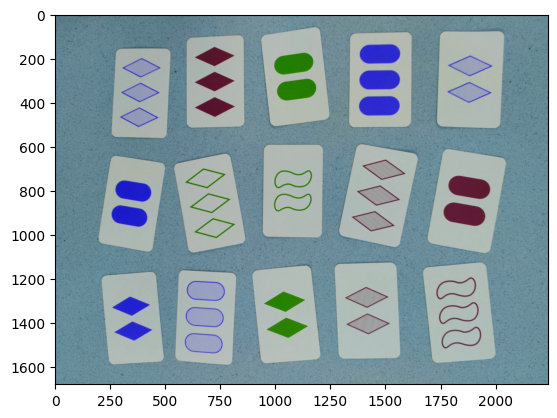

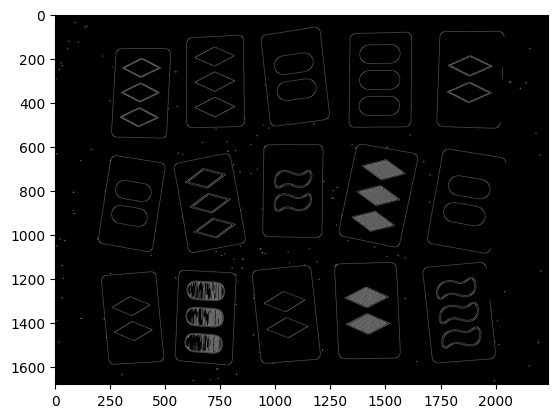

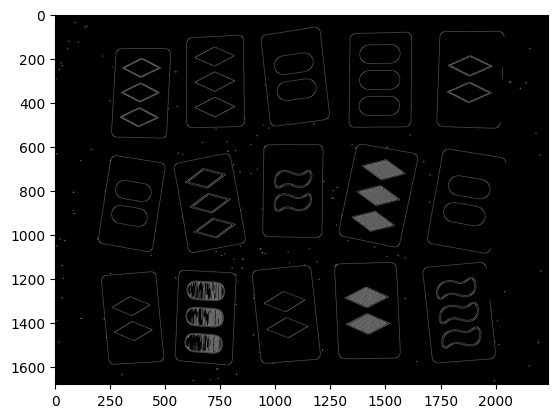

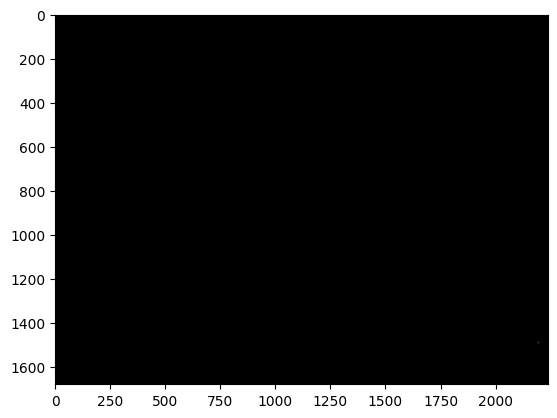

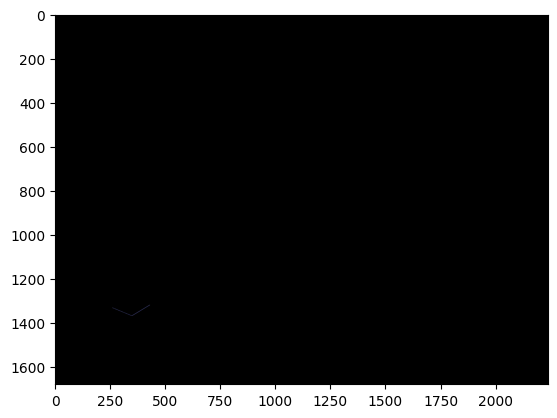

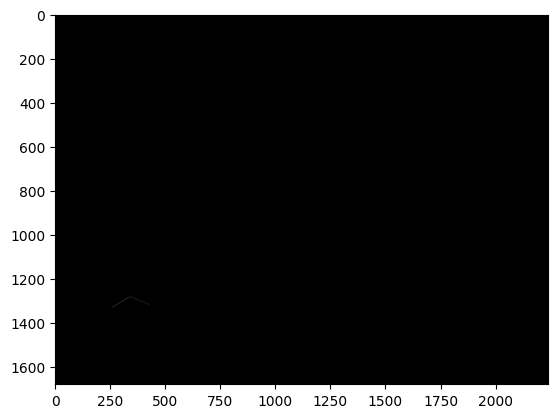

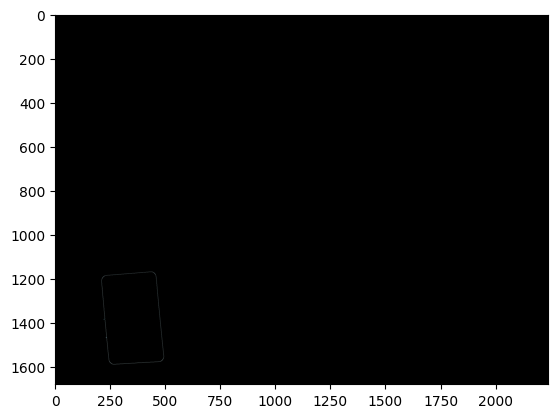

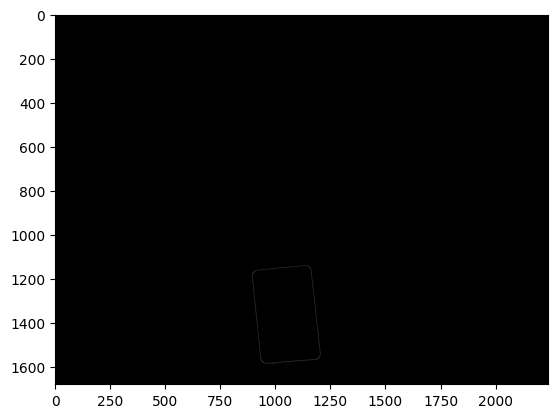

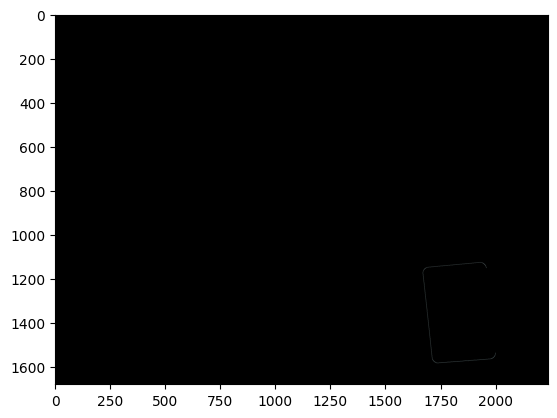

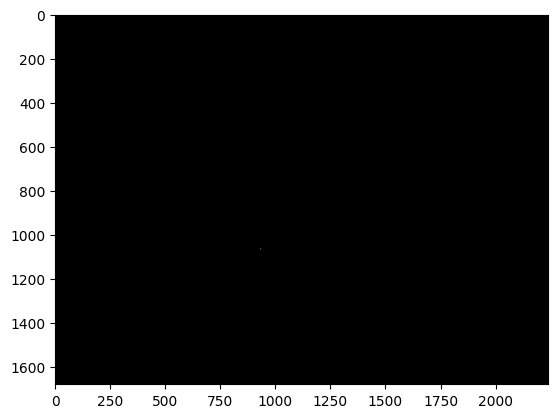

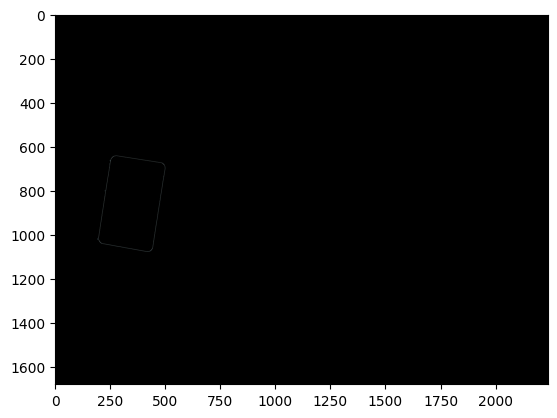

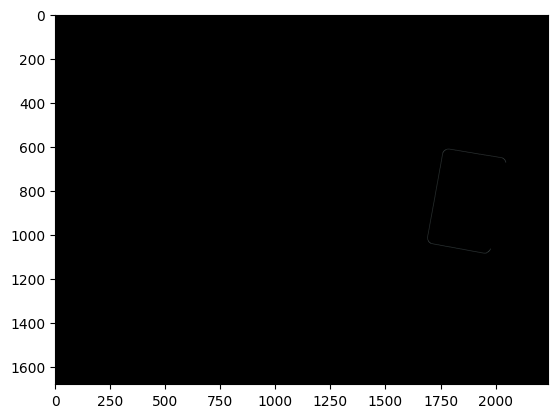

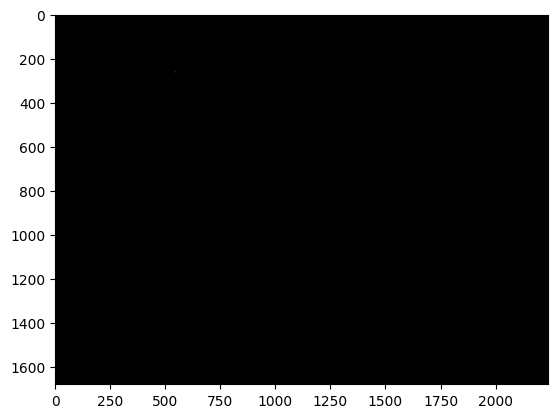

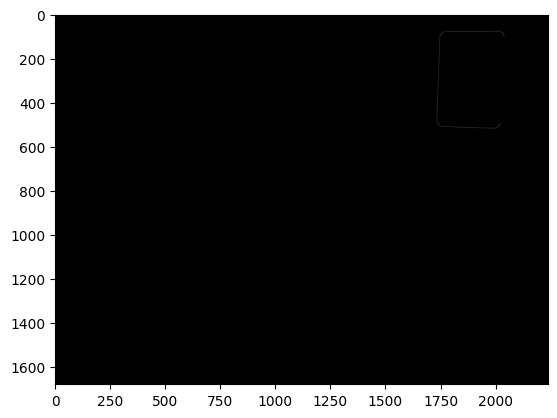

In [32]:
  
img = cv2.imread('imgs/card2.jpg')
img=cv2.GaussianBlur(img,(3,3),200)
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 100, 200)
ret, thresh = cv2.threshold(canny, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.show()
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
min_area = 30000.0
good_contours = []
x=0
big=None
for contour in contours:

        x+=1
        mask = np.zeros(img.shape[:2], np.uint8)
        area = cv2.contourArea(contour)
        cv2.drawContours(mask, [contour],-1, 255, -1)
        masked = cv2.bitwise_and(img, img, mask=mask)

        if area < 19 or area>69.5 :
           continue

        
        plt.imshow(masked)
        plt.show()
